# Project 2 Code
### Group Members: 
#### Jiayu Guo(504513188), Yitian Hu(904516321), Peidong Chen(204432674), Yang Yang(804522285)

### Problem (a)

In [3]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics','rec.autos']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
def get_Number(fileName):
    count_vect = CountVectorizer()
    categories = [fileName]
    comp_graphic_train = fetch_20newsgroups(subset='train', categories=categories)
    comp_graphics_number = count_vect.fit_transform(comp_graphic_train.data)
    #print("(number of documents, number of features) = (%s, %s) " % comp_graphics_number.shape)
    [r,v] = comp_graphics_number.shape
    return r

comp_graphics_number = get_Number('comp.graphics')
comp_os_mswindows_misc_number = get_Number('comp.os.ms-windows.misc')
comp_sys_ibm_pc_hardware_number = get_Number('comp.sys.ibm.pc.hardware')
comp_sys_mac_hardware_number = get_Number('comp.sys.mac.hardware')
rec_autos_number = get_Number('rec.autos')
rec_motorcycles_number = get_Number('rec.motorcycles')
rec_sport_baseball_number = get_Number('rec.sport.baseball')
rec_sport_hockey_number = get_Number('rec.sport.hockey')

In [5]:
Number_Computer_technology = comp_graphics_number+comp_os_mswindows_misc_number+comp_sys_ibm_pc_hardware_number+comp_sys_mac_hardware_number
Number_Recreational_activity = rec_autos_number+rec_motorcycles_number+rec_sport_baseball_number+rec_sport_hockey_number

print("Number of class is = %s" % Number_Computer_technology)
print("Number of class is = %s" % Number_Recreational_activity)

import numpy as np
import matplotlib.pyplot as plt

n_groups = 8

document_number = (comp_graphics_number, comp_os_mswindows_misc_number, comp_sys_ibm_pc_hardware_number, comp_sys_mac_hardware_number, rec_autos_number, rec_motorcycles_number, rec_sport_baseball_number, rec_sport_hockey_number)
# fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

Number of class is = 2343
Number of class is = 2389


In [6]:
print document_number


(584, 591, 590, 578, 594, 598, 597, 600)


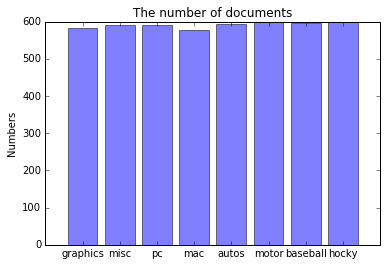

In [67]:
objects = ('graphics', 'misc', 'pc', 'mac', 'autos', 'motor','baseball','hocky')
y_pos = np.arange(len(objects))

%matplotlib inline
plt.figure()
plt.bar(y_pos, document_number, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Numbers')
plt.title('The number of documents')
plt.show()


### Problem (b)

We need to use the command "nltk.download()". And choose the "Models" option. Download the "Punkt" package which is the requirement of this problem.

In [73]:
from sklearn.feature_extraction import text
import string
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
stop_words = text.ENGLISH_STOP_WORDS.union(string.punctuation)

In [74]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42, remove = ('headers','footers','quotes'))

The converse mapping from feature name to column index is stored in the vocabulary_ attribute of the vectorizer:

In [75]:
import nltk
import re
import string
#import regex as re
# stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def remove_punctuation(text):
    return re.sub(r'[^A-Za-z]', " ", text)
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    
    tokens =[word for sent in nltk.sent_tokenize(remove_punctuation(text)) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]{2,}', token):
            filtered_tokens.append(token)
         
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [76]:
count_vect = TfidfVectorizer(tokenizer=tokenize_and_stem,min_df=1,max_df=0.95,stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
# count_vect = TfidfVectorizer(min_df=1,max_df=0.95,stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
# count_vect = CountVectorizer(min_df=1, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
# X_train_counts = count_vect.fit_transform(stemmed)
X_train_counts = count_vect.fit_transform(twenty_train.data)
print X_train_counts.shape
#X_train_counts
#print(X_train_counts[0,3949])
#0, 6035
#print (count_vect.get_feature_names())

(11314, 55444)


In [12]:
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#print (X_train_tfidf)
# X_train_tfidf.toarray()[:30,:10]

### Problem (c)

In [81]:
def get_max_feature(fileName):
    categories = [fileName]
    twenty_train_c = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
    count_vect_c = TfidfVectorizer(tokenizer=tokenize_and_stem,min_df=1,max_features=10, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
#     count_vect_c = TfidfVectorizer(min_df=1,max_features=25, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
    X_train_counts_c = count_vect_c.fit_transform(twenty_train_c.data)
    return count_vect_c.vocabulary_.keys()


print (get_max_feature('comp.sys.ibm.pc.hardware'))
print (get_max_feature('comp.sys.mac.hardware'))
print (get_max_feature('misc.forsale'))
print (get_max_feature('soc.religion.christian'))

[u'ani', u'drive', u'problem', u'disk', u'mb', u'work', u'card', u'scsi', u'use', u'control']
[u'ani', u'mac', u'drive', u'problem', u'mb', u'work', u'card', u'know', u'use', u'appl']
[u'new', u'dos', u'offer', u'sale', u'ship', u'sell', u'includ', u'price', u'pleas', u'use']
[u'think', u'peopl', u'say', u'believ', u'church', u'jesus', u'god', u'christian', u'ani', u'know']


### Problem (d)

In [14]:
from sklearn.decomposition import TruncatedSVD
tsv = TruncatedSVD(n_components=50,algorithm='arpack')
X_train_lsi = tsv.fit_transform(X_train_counts)
print (X_train_lsi.shape)

(11314, 50)


### Problem (e)

In [82]:
categories = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
twenty_train_target = np.asarray([ int(x / 4) for x in twenty_train.target])
twenty_test_target = np.asarray([ int(x / 4) for x in twenty_test.target])
#print twenty_test_target
#count_vect = TfidfVectorizer(min_df=1, stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
#X_train_counts = count_vect.fit_transform(twenty_train.data)
#print twenty_train.target
#print twenty_train_target

In [83]:
def data_process(twenty_test):
    count_vect_test = TfidfVectorizer(tokenizer=tokenize_and_stem,min_df=1,max_df=0.95,stop_words= stop_words, token_pattern='[a-zA-Z]{2,}')
    X_test_counts = count_vect_test.fit_transform(twenty_test.data)
    tsv_test = TruncatedSVD(n_components=50,algorithm='arpack')
    X_test_lsi = tsv_test.fit_transform(X_test_counts)
    return X_test_lsi

In [84]:
from sklearn.svm import LinearSVC
X_train_lsi=data_process(twenty_train)
clf = LinearSVC(C=10e20).fit(X_train_lsi, twenty_train_target)

In [85]:
X_test_lsi = data_process(twenty_test)
predicted = clf.predict(X_test_lsi)
print predicted
score = clf.score(X_test_lsi, twenty_test_target)
print score

[1 0 0 ..., 0 0 0]
0.756507936508


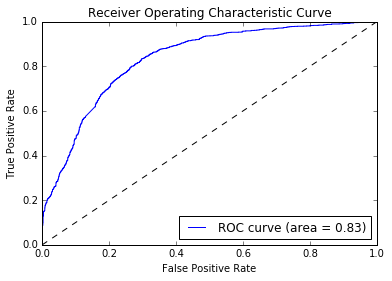

In [86]:
from sklearn.metrics import roc_curve, auc
y_score=clf.decision_function(X_test_lsi)
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
#average_precision = average_precision_score(twenty_test.target, y_score)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [87]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

[[1241  319]
 [ 448 1142]]


##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [88]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

0.756507936508


##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [89]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

0.78165639972621492

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [90]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

0.71823899371069178

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [25]:
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import average_precision_score
#from sklearn.preprocessing import label_binarize
#X_train = X_train_lsi
#X_test = X_test_lsi
#y_train = twenty_train.target
#y_test = twenty_test.target
#y_score = clf.decision_function(X_test_lsi)
#y = label_binarize(twenty_train.target, classes=[0, 1])
# n_classes = y.shape
#print n_classes
# Compute Precision-Recall and plot curve
#precision = dict()
#recall = dict()
#average_precision = dict()
#for i in range(n_classes):
#precision, recall, _ = precision_recall_curve(y_test,y_score)    
#average_precision = average_precision_score(y_test, y_score)
#average_recall = average_recall_score(y_test, y_score)

#print precision
#print recall
#print average_precision
#print average_recall

### Problem (f)

In [91]:
from sklearn.cross_validation import KFold
kf = KFold(n=len(twenty_train_target), n_folds=5, shuffle=False, random_state=None)
twenty_train_data = data_process(twenty_train)
twenty_test_data = data_process(twenty_test)
l = [[0]*7 for i in range(5)]
i=0
j=0
#la=[]
for train_index, test_index in kf:
    #print train_index
    #[ int(x / 4) for x in twenty_train.target]
    X_train_soft, X_test_soft = twenty_train_data[train_index], twenty_train_data[test_index]
    for k in [-3, -2, -1, 0, 1, 2, 3]:
        target_train = np.asarray([ int(x / 4) for x in twenty_train.target[train_index]])
        target_test =np.asarray([ int(x / 4) for x in twenty_train.target[test_index]])
        clf_soft = LinearSVC(C=10**k).fit(X_train_soft, target_train)
        #predicted_soft = clf.predict(X_test_soft_lsi)
        score = clf_soft.score(X_test_soft, target_test)
        #if k==1:
        #    print score
        #la.append(score)
        l[i][j]=score
        j=j+1
        #print 1
    i=i+1
    j=0

#print train_index
#twenty_train.data
#print (l)
#print la
# twenty_train_target[1]

In [92]:
#twenty_train.target[train_index]

In [93]:
average_s = list(map(lambda x: (x[0]+x[1]+x[2]+x[3]+x[4])/5, zip(l[0], l[1], l[2], l[3], l[4])))
#print average_s
value = max(average_s)
index=average_s.index(value)
#print index
penalty = [-3, -2, -1, 0, 1, 2, 3]
print ('The best penalty value is',10**penalty[index])

('The best penalty value is', 100)


In [94]:
clf_soft_pre = LinearSVC(C=10**2).fit(twenty_train_data, twenty_train_target)
predicted_soft_pre = clf_soft_pre.predict(twenty_test_data)

s = clf_soft_pre.score(twenty_test_data, twenty_test_target)
print s

0.760952380952


##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [95]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted_soft_pre
print confusion_matrix(y_true, y_pred)

[[1278  282]
 [ 471 1119]]


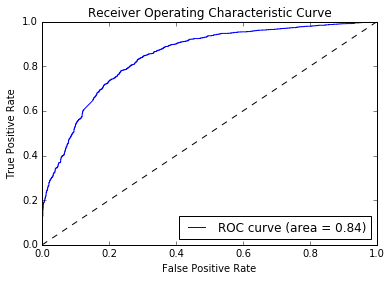

In [96]:
from sklearn.metrics import roc_curve, auc
y_score=clf_soft_pre.decision_function(twenty_test_data)
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [97]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
print accuracy_score(y_true, y_pred)

0.760952380952


##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [98]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
precision_score(y_true, y_pred)  

0.79871520342612423

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [99]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted_soft_pre
recall_score(y_true, y_pred) 

0.70377358490566033

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [100]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from sklearn.preprocessing import label_binarize
# X_train = X_train_lsi
# X_test = X_test_lsi
# y_train = twenty_train.target
# y_test = twenty_test.target
# y_score = clf_soft_pre.decision_function(X_test_lsi)
# y = label_binarize(twenty_train.target, classes=[0, 1])
# # n_classes = y.shape
# #print n_classes
# # Compute Precision-Recall and plot curve
# precision = dict()
# recall = dict()
# average_precision = dict()
# #for i in range(n_classes):
# precision, recall, _ = precision_recall_curve(y_test,y_score)    
# average_precision = average_precision_score(y_test, y_score)

# # print precision
# # print recall
# print average_precision

### Problem (g)

##### Naïve Bayes Algorithm [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [101]:
from sklearn.naive_bayes import GaussianNB
clf_naive_bayes = GaussianNB().fit(X_train_lsi, twenty_train_target)

In [102]:
X_test_lsi = data_process(twenty_test)
predicted = clf_naive_bayes.predict(X_test_lsi)
print predicted.shape
score = clf_naive_bayes.score(X_test_lsi, twenty_test_target)
print score

(3150L,)
0.686031746032


##### ROC curve [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

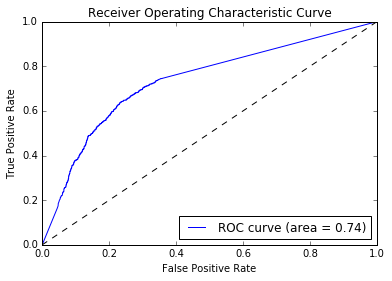

In [103]:
from sklearn.metrics import roc_curve, auc
y_score=clf_naive_bayes.predict_proba(X_test_lsi)[:, 1]
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [104]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

[[1257  303]
 [ 686  904]]


##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [105]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

0.686031746032


##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [106]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

0.74896437448218722

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [107]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

0.56855345911949684

##### Recall and precision of your classifier. [Reference Link](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [43]:
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score
# from sklearn.preprocessing import label_binarize
# X_train = X_train_lsi
# X_test = X_test_lsi
# y_train = twenty_train.target
# y_test = twenty_test.target
# y_score = clf_naive_bayes.predict_proba(X_test_lsi)[:, 1]
# y = label_binarize(twenty_train.target, classes=[0, 1])
# # n_classes = y.shape
# #print n_classes
# # Compute Precision-Recall and plot curve
# precision = dict()
# recall = dict()
# average_precision = dict()
# #for i in range(n_classes):
# precision, recall, _ = precision_recall_curve(y_test,y_score)    
# average_precision = average_precision_score(y_test, y_score)
# #average_recall = average_recall_score(y_test, y_score)

# # print precision
# #print recall
# #print average_precision

### Problem (h)

###### logistic regression [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [108]:
from sklearn.linear_model import LogisticRegression
clf_logistic_regression = LogisticRegression().fit(X_train_lsi, twenty_train_target)

In [109]:
X_test_lsi = data_process(twenty_test)
predicted = clf_logistic_regression.predict(X_test_lsi)
print predicted.shape
score = clf_logistic_regression.score(X_test_lsi, twenty_test_target)
print score

(3150L,)
0.828571428571


##### ROC curve [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

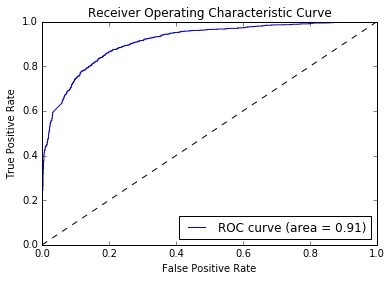

In [110]:
from sklearn.metrics import roc_curve, auc
y_score=clf_logistic_regression.predict_proba(X_test_lsi)[:, 1]
fpr, tpr, _ = roc_curve(twenty_test_target, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

##### Confusion matrix. [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [111]:
from sklearn.metrics import confusion_matrix
y_true = twenty_test_target
y_pred = predicted
print confusion_matrix(y_true, y_pred)

[[1335  225]
 [ 315 1275]]


##### Accuracy [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [112]:
from sklearn.metrics import accuracy_score
y_true = twenty_test_target
y_pred = predicted
print accuracy_score(y_true, y_pred)

0.828571428571


##### Precision [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [113]:
from sklearn.metrics import precision_score
y_true = twenty_test_target
y_pred = predicted
precision_score(y_true, y_pred)  

0.84999999999999998

##### Recall [Reference Link](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)

In [114]:
from sklearn.metrics import recall_score
y_true = twenty_test_target
y_pred = predicted
recall_score(y_true, y_pred) 

0.80188679245283023

### Problem (i)

In [51]:
#from sklearn.preprocessing import label_binarize
#y = twenty_train_i.target
#y = label_binarize(y, classes=[0, 1, 2, 3])
#n_classes = y.shape[1]
#print n_classes
#y_test = twenty_test_i.target
#y_test = label_binarize(y_test, classes=[0, 1, 2, 3])

In [52]:
#import scipy.sparse
#twenty_train_lsi_i_s = scipy.sparse.csr_matrix(twenty_train_lsi_i)
#y_s = scipy.sparse.csr_matrix(twenty_train_i.target)
#twenty_test_lsi_i_s = scipy.sparse.csr_matrix(twenty_test_lsi_i)
#y_test_s = scipy.sparse.csr_matrix(twenty_test_i.target)

In [115]:
misc_num = get_Number('misc.forsale')
chri_num = get_Number('soc.religion.christian')
#print misc_num
#print chri_num
#585,599

In [116]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics
#590,578,
categories_i = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
twenty_train_i = fetch_20newsgroups(subset='train', categories=categories_i, shuffle=True, random_state=6, remove = ('headers','footers','quotes'))
twenty_test_i = fetch_20newsgroups(subset='test', categories=categories_i, shuffle=True, random_state=6, remove = ('headers','footers','quotes'))
twenty_train_lsi_i = data_process(twenty_train_i)
twenty_test_lsi_i = data_process(twenty_test_i)
twenty_train_i_target = twenty_train_i.target

In [55]:
#categories_i_1 = ['comp.sys.ibm.pc.hardware']
#twenty_train_i_1 = fetch_20newsgroups(subset='train', categories=categories_i_1, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
#twenty_train_lsi_i_1 = data_process(twenty_train_i_1)
#data_1 = np.c_[twenty_train_lsi_i_1,twenty_train_i_1.target]
#data_1=np.delete(data_1, np.s_[500:],0)
#categories_i_2 = ['comp.sys.mac.hardware']
#twenty_train_i_2 = fetch_20newsgroups(subset='train', categories=categories_i_2, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
#twenty_train_lsi_i_2 = data_process(twenty_train_i_2)
#target_2 = np.asarray([1 for x in twenty_train_i_2.target])
#data_2 = np.c_[twenty_train_lsi_i_2,target_2]
#data_2=np.delete(data_2, np.s_[500:],0)
#categories_i_3 = ['misc.forsale']
#twenty_train_i_3 = fetch_20newsgroups(subset='train', categories=categories_i_3, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
#twenty_train_lsi_i_3 = data_process(twenty_train_i_3)
#target_3 = np.asarray([2 for x in twenty_train_i_3.target])
#data_3 = np.c_[twenty_train_lsi_i_3,target_3]
#data_3=np.delete(data_3, np.s_[500:],0)
#categories_i_4 = ['soc.religion.christian']
#twenty_train_i_4 = fetch_20newsgroups(subset='train', categories=categories_i_4, shuffle=True, random_state=42, remove = ('headers','footers','quotes'))
#twenty_train_lsi_i_4 = data_process(twenty_train_i_4)
#target_4 = np.asarray([3 for x in twenty_train_i_4.target])
#data_4 = np.c_[twenty_train_lsi_i_4,target_4]
#data_4=np.delete(data_4, np.s_[500:],0)

In [56]:
#data = np.vstack((data_1, data_2, data_3, data_4))
#np.random.shuffle(data)
#twenty_train_lsi_i = data[:, :-1]
#twenty_train_i_target = data[:,-1]

##### One VS Rest

In [117]:
fit_i = OneVsRestClassifier(LinearSVC(random_state = 0)).fit(twenty_train_lsi_i, twenty_train_i_target)
predict_i = fit_i.predict(twenty_test_lsi_i)
score = fit_i.score(twenty_test_lsi_i, twenty_test_i.target)
#score = metrics.accuracy_score(predict_i, twenty_test_i.target)
predict_score = fit_i.decision_function(twenty_test_lsi_i)
print score

0.582747603834


In [118]:
fpr = dict()
tpr = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],predict_score[:, i])

#print precision
#print recall

print precision_score(twenty_test_i.target, predict_i,average='weighted')  
print recall_score(twenty_test_i.target, predict_i,average='weighted') 
print accuracy_score(twenty_test_i.target, predict_i)
print confusion_matrix(twenty_test_i.target, predict_i)

0.563982043464
0.582747603834
0.582747603834
[[149 178  60   5]
 [124  94 140  27]
 [ 37  35 308  10]
 [  4   5  28 361]]


##### One VS One

In [119]:
fit_i = OneVsOneClassifier(LinearSVC()).fit(twenty_train_lsi_i, twenty_train_i_target)
predict_i = fit_i.predict(twenty_test_lsi_i)
score = fit_i.score(twenty_test_lsi_i, twenty_test_i.target)
predict_score = fit_i.decision_function(twenty_test_lsi_i)
print score 

0.580191693291


In [120]:
fpr = dict()
tpr = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],predict_score[:, i])

#print precision
#print recall
print precision_score(twenty_test_i.target, predict_i,average='weighted')  
print recall_score(twenty_test_i.target, predict_i, average='weighted') 
print accuracy_score(twenty_test_i.target, predict_i)
print confusion_matrix(twenty_test_i.target, predict_i)

0.571965590504
0.580191693291
0.580191693291
[[156 175  59   2]
 [145  94 136  10]
 [ 37  37 310   6]
 [  5  10  35 348]]


##### Naive bayes

In [121]:
clf_naive_bayes = GaussianNB().fit(twenty_train_lsi_i, twenty_train_i_target)
predicted = clf_naive_bayes.predict(twenty_test_lsi_i)
print predicted.shape
score = clf_naive_bayes.score(twenty_test_lsi_i, twenty_test_i.target)
print score

print precision_score(twenty_test_i.target, predicted,average='weighted')  
print recall_score(twenty_test_i.target, predicted,average='weighted') 
print accuracy_score(twenty_test_i.target, predicted)
print confusion_matrix(twenty_test_i.target, predicted)

(1565L,)
0.444089456869
0.449276631965
0.444089456869
0.444089456869
[[137 161  72  22]
 [109 127 105  44]
 [ 79  45 204  62]
 [ 97  18  56 227]]
